In [1]:
import pandas as pd

df = pd.read_csv("IMDB-Dataset.csv")

In [2]:
df

,Ratings,Reviews,Movies,Resenhas
0,1.0,*Disclaimer: I only watched this movie as a co...,Disaster Movie,* Isenção de responsabilidade: eu só assisti e...
1,1.0,I am writing this in hopes that this gets put ...,Disaster Movie,Estou escrevendo isso na esperança de que isso...
2,1.0,"Really, I could write a scathing review of thi...",Disaster Movie,"Realmente, eu poderia escrever uma crítica con..."
3,1.0,If you saw the other previous spoof movies by ...,Disaster Movie,Se você viu os outros filmes falsificados ante...
4,1.0,This movie I saw a day early for free and I st...,Disaster Movie,Este filme eu vi um dia cedo de graça e ainda ...
...,...,...,...,...
149995,10.0,GoldenEye (1995) is my number 1 personal favor...,GoldenEye,GoldenEye (1995) é o meu filme favorito pessoa...
149996,10.0,"*** 1/2Starring: Pierce Brosnan, Izabella Scor...",GoldenEye,"Estrelando: Pierce Brosnan, Izabella Scorupco,..."
149997,10.0,"I've given this film a 10, not just because I ...",GoldenEye,"Eu dei 10 a este filme, não apenas porque eu g..."
149998,10.0,I absolutely adore this movie. What a comeback...,GoldenEye,Eu absolutamente adoro este filme. Que retorno...


In [3]:
df_new = df.drop(['Resenhas', 'Movies'], axis=1)
df_new

,Ratings,Reviews
0,1.0,*Disclaimer: I only watched this movie as a co...
1,1.0,I am writing this in hopes that this gets put ...
2,1.0,"Really, I could write a scathing review of thi..."
3,1.0,If you saw the other previous spoof movies by ...
4,1.0,This movie I saw a day early for free and I st...
...,...,...
149995,10.0,GoldenEye (1995) is my number 1 personal favor...
149996,10.0,"*** 1/2Starring: Pierce Brosnan, Izabella Scor..."
149997,10.0,"I've given this film a 10, not just because I ..."
149998,10.0,I absolutely adore this movie. What a comeback...


In [4]:
# Create a function to map ratings to sentiment categories
def map_rating_to_sentiment(rating):
    if 1.0 <= rating <= 2.0:
        return 'very negative'
    elif 3.0 <= rating <= 4.0:
        return 'negative'
    elif 5.0 <= rating <= 6.0:
        return 'neutral'
    elif 7.0 <= rating <= 8.0:
        return 'positive'
    elif 9.0 <= rating <= 10.0:
        return 'very positive'
    else:
        return 'unknown'  # for any edge cases

# Apply the mapping to the Ratings column
df_new['Ratings'] = df_new['Ratings'].apply(map_rating_to_sentiment)

df_new = df_new.rename(columns={'Ratings':'Sentiment'})

# Check the result
print("Updated Ratings column:")
print(df_new['Sentiment'].value_counts())
df_new.head()

Updated Ratings column:
Sentiment
very negative    30000
negative         30000
neutral          30000
positive         30000
very positive    30000
Name: count, dtype: int64


,Sentiment,Reviews
0,very negative,*Disclaimer: I only watched this movie as a co...
1,very negative,I am writing this in hopes that this gets put ...
2,very negative,"Really, I could write a scathing review of thi..."
3,very negative,If you saw the other previous spoof movies by ...
4,very negative,This movie I saw a day early for free and I st...


In [5]:
sum = 0

for r in df['Reviews']:
    sum += len(r.split())

average_length = sum / len(df['Reviews'])
average_length

219.25716

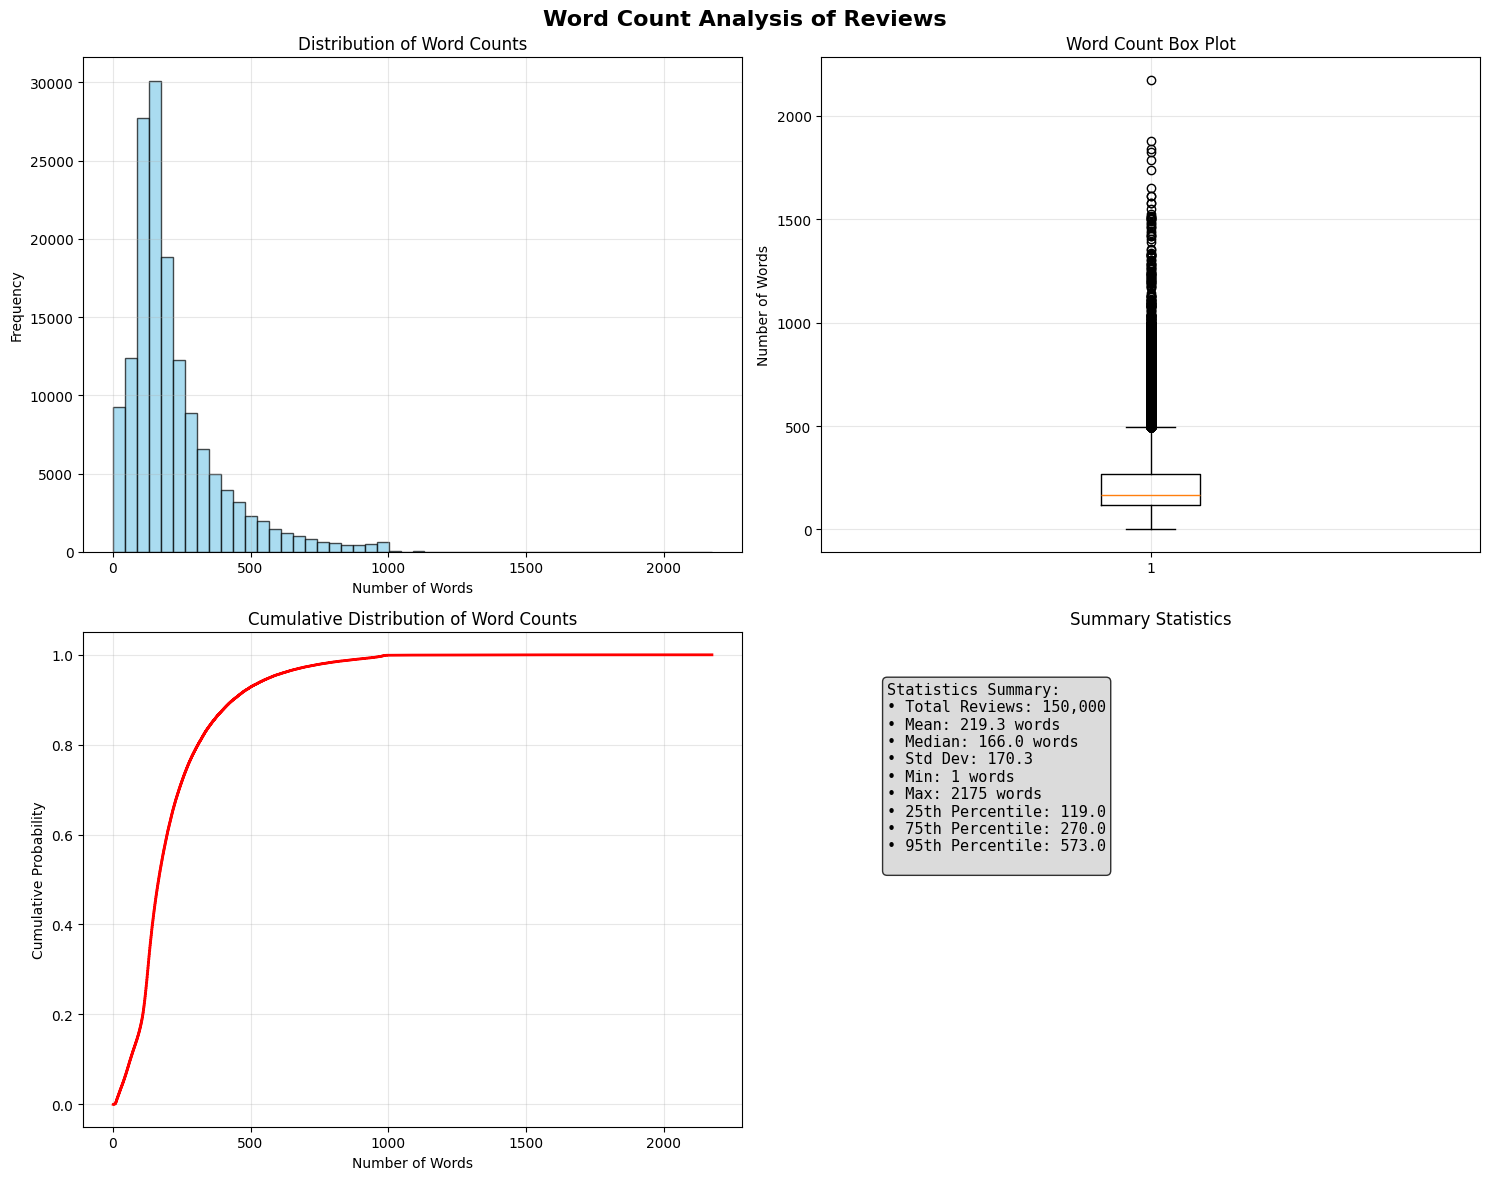

📊 WORD COUNT ANALYSIS
Average word count: 219.26
Median word count: 166.00
Standard deviation: 170.29
Minimum word count: 1
Maximum word count: 2175

Percentiles:
10th percentile: 64.0 words
25th percentile: 119.0 words
50th percentile: 166.0 words
75th percentile: 270.0 words
90th percentile: 437.0 words
95th percentile: 573.0 words
99th percentile: 885.0 words


In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate word counts for all reviews
word_counts = [len(review.split()) for review in df['Reviews']]

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Word Count Analysis of Reviews', fontsize=16, fontweight='bold')

# 1. Histogram
axes[0,0].hist(word_counts, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Distribution of Word Counts')
axes[0,0].set_xlabel('Number of Words')
axes[0,0].set_ylabel('Frequency')
axes[0,0].grid(True, alpha=0.3)

# 2. Box plot
axes[0,1].boxplot(word_counts)
axes[0,1].set_title('Word Count Box Plot')
axes[0,1].set_ylabel('Number of Words')
axes[0,1].grid(True, alpha=0.3)

# 3. Cumulative distribution
sorted_counts = np.sort(word_counts)
cumulative = np.arange(1, len(sorted_counts) + 1) / len(sorted_counts)
axes[1,0].plot(sorted_counts, cumulative, color='red', linewidth=2)
axes[1,0].set_title('Cumulative Distribution of Word Counts')
axes[1,0].set_xlabel('Number of Words')
axes[1,0].set_ylabel('Cumulative Probability')
axes[1,0].grid(True, alpha=0.3)

# 4. Statistics summary
stats_text = f"""Statistics Summary:
• Total Reviews: {len(word_counts):,}
• Mean: {np.mean(word_counts):.1f} words
• Median: {np.median(word_counts):.1f} words
• Std Dev: {np.std(word_counts):.1f}
• Min: {np.min(word_counts)} words
• Max: {np.max(word_counts)} words
• 25th Percentile: {np.percentile(word_counts, 25):.1f}
• 75th Percentile: {np.percentile(word_counts, 75):.1f}
• 95th Percentile: {np.percentile(word_counts, 95):.1f}
"""

axes[1,1].text(0.1, 0.9, stats_text, transform=axes[1,1].transAxes, 
               fontsize=11, verticalalignment='top', fontfamily='monospace',
               bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))
axes[1,1].set_title('Summary Statistics')
axes[1,1].axis('off')

plt.tight_layout()
plt.show()

# Print additional insights
print("📊 WORD COUNT ANALYSIS")
print("=" * 50)
print(f"Average word count: {np.mean(word_counts):.2f}")
print(f"Median word count: {np.median(word_counts):.2f}")
print(f"Standard deviation: {np.std(word_counts):.2f}")
print(f"Minimum word count: {np.min(word_counts)}")
print(f"Maximum word count: {np.max(word_counts)}")

# Show percentiles
percentiles = [10, 25, 50, 75, 90, 95, 99]
print(f"\nPercentiles:")
for p in percentiles:
    print(f"{p}th percentile: {np.percentile(word_counts, p):.1f} words")

In [7]:
import re, emoji, html
from bs4 import BeautifulSoup

def clean(text):
    text = BeautifulSoup(text, "html.parser").get_text(" ")  # strip HTML tags
    text = html.unescape(text)                               # e.g. &amp; → &
    text = emoji.demojize(text, delimiters=(" ", " "))       # 😀 →  smile_face 
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)  # remove URLs
    text = re.sub(r"@\w+", "", text)                          # remove mentions
    text = re.sub(r"#\w+", "", text)                          # remove hashtags
    text = re.sub(r"[^\w\s.,!?;:]", "", text)       # remove special characters
    text = text.lower()                                       # convert to lowercase    
    text = re.sub(r"\s+", " ", text).strip()                 # collapse spaces
    return text

In [8]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
class sentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text  = self.texts[idx]
        label = int(self.labels[idx])
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding="max_length",
            max_length=self.max_length,
            return_tensors="pt"
        )
        return {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
            "labels": torch.tensor(label, dtype=torch.long)
        }

d:\ai-notebook\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader

# First, let's fix the label mapping issue
def class2id(label):
    if label == "very negative":
        return 0
    elif label == "negative":
        return 1
    elif label == "neutral":
        return 2
    elif label == "positive":
        return 3
    elif label == "very positive":
        return 4
    else:
        raise ValueError(f"Unknown sentiment label: {label}")

# Prepare the data
texts_raw = df_new["Reviews"].astype(str).tolist()
texts_clean = [clean(t) for t in texts_raw]
labels = [class2id(label) for label in df_new["Sentiment"].tolist()]

print(f"Total samples: {len(texts_clean)}")
print(f"Label distribution: {df_new['Sentiment'].value_counts()}")

# Split the dataset: 70% train, 15% validation, 15% test
X_temp, X_test, y_temp, y_test = train_test_split(
    texts_clean, labels, 
    test_size=0.15, 
    random_state=42, 
    stratify=labels
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, 
    test_size=0.1765,  # 0.15/0.85 to get 15% of total
    random_state=42, 
    stratify=y_temp
)

print(f"\nDataset splits:")
print(f"Train: {len(X_train)} samples")
print(f"Validation: {len(X_val)} samples")  
print(f"Test: {len(X_test)} samples")

# Update your model for 5 classes (since you have 5 sentiment categories)
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=5)

# Create datasets
train_dataset = sentimentDataset(X_train, y_train, tokenizer, max_length=512)
val_dataset = sentimentDataset(X_val, y_val, tokenizer, max_length=512)
test_dataset = sentimentDataset(X_test, y_test, tokenizer, max_length=512)

# Create data loaders
cuda = torch.cuda.is_available()
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, pin_memory=cuda)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, pin_memory=cuda)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, pin_memory=cuda)

print(f"\nData loaders created successfully!")
print(f"Training batches: {len(train_loader)}")
print(f"Validation batches: {len(val_loader)}")
print(f"Test batches: {len(test_loader)}")

# Verify label distribution in each split
import pandas as pd
train_label_dist = pd.Series(y_train).value_counts().sort_index()
val_label_dist = pd.Series(y_val).value_counts().sort_index()
test_label_dist = pd.Series(y_test).value_counts().sort_index()

print(f"\nLabel distribution across splits:")
label_names = ["very negative", "negative", "neutral", "positive", "very positive"]
for i, name in enumerate(label_names):
    print(f"{name:>15}: Train={train_label_dist.get(i, 0):>4}, Val={val_label_dist.get(i, 0):>4}, Test={test_label_dist.get(i, 0):>4}")

Total samples: 150000
Label distribution: Sentiment
very negative    30000
negative         30000
neutral          30000
positive         30000
very positive    30000
Name: count, dtype: int64

Dataset splits:
Train: 104996 samples
Validation: 22504 samples
Test: 22500 samples


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Data loaders created successfully!
Training batches: 6563
Validation batches: 1407
Test batches: 1407

Label distribution across splits:
  very negative: Train=20999, Val=4501, Test=4500
       negative: Train=21000, Val=4500, Test=4500
        neutral: Train=20999, Val=4501, Test=4500
       positive: Train=20999, Val=4501, Test=4500
  very positive: Train=20999, Val=4501, Test=4500


In [11]:
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader

# First, let's fix the label mapping issue
def class2id(label):
    if label == "very negative":
        return 0
    elif label == "negative":
        return 1
    elif label == "neutral":
        return 2
    elif label == "positive":
        return 3
    elif label == "very positive":
        return 4
    else:
        raise ValueError(f"Unknown sentiment label: {label}")

# Prepare the data
texts_raw = df_new["Reviews"].astype(str).tolist()
texts_clean = [clean(t) for t in texts_raw]
labels = [class2id(label) for label in df_new["Sentiment"].tolist()]

print(f"Original total samples: {len(texts_clean)}")
print(f"Original label distribution:\n{df_new['Sentiment'].value_counts()}")

# Limit each label to 2000 records
max_samples_per_label = 2000
balanced_texts = []
balanced_labels = []

# Group by sentiment labels
for sentiment_label in ["very negative", "negative", "neutral", "positive", "very positive"]:
    # Get indices for this label
    label_mask = df_new["Sentiment"] == sentiment_label
    label_indices = df_new[label_mask].index.tolist()
    
    # Limit to max_samples_per_label
    if len(label_indices) > max_samples_per_label:
        # Randomly sample max_samples_per_label records
        import random
        random.seed(42)
        label_indices = random.sample(label_indices, max_samples_per_label)
    
    # Add to balanced dataset
    for idx in label_indices:
        original_idx = df_new.index.get_loc(idx)  # Convert to position in original lists
        balanced_texts.append(texts_clean[original_idx])
        balanced_labels.append(labels[original_idx])

print(f"\nBalanced total samples: {len(balanced_texts)}")

# Check new distribution
balanced_sentiment_labels = [df_new.iloc[df_new.index.get_loc(idx)]["Sentiment"] 
                           for idx in df_new.index 
                           if df_new.index.get_loc(idx) < len(balanced_texts)]

# Simpler approach - use pandas groupby
df_balanced = df_new.groupby('Sentiment').apply(lambda x: x.sample(n=min(len(x), max_samples_per_label), random_state=42)).reset_index(drop=True)

# Recreate texts and labels from balanced dataframe
texts_clean_balanced = [clean(t) for t in df_balanced["Reviews"].astype(str).tolist()]
labels_balanced = [class2id(label) for label in df_balanced["Sentiment"].tolist()]

print(f"\nFinal balanced dataset:")
print(f"Total samples: {len(texts_clean_balanced)}")
print(f"Label distribution:\n{df_balanced['Sentiment'].value_counts()}")

# Split the balanced dataset: 70% train, 15% validation, 15% test
X_temp, X_test, y_temp, y_test = train_test_split(
    texts_clean_balanced, labels_balanced, 
    test_size=0.15, 
    random_state=42, 
    stratify=labels_balanced
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, 
    test_size=0.1765,  # 0.15/0.85 to get 15% of total
    random_state=42, 
    stratify=y_temp
)

print(f"\nDataset splits:")
print(f"Train: {len(X_train)} samples")
print(f"Validation: {len(X_val)} samples")  
print(f"Test: {len(X_test)} samples")

# Update your model for 5 classes (since you have 5 sentiment categories)
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=5)

# Create datasets
train_dataset = sentimentDataset(X_train, y_train, tokenizer, max_length=512)
val_dataset = sentimentDataset(X_val, y_val, tokenizer, max_length=512)
test_dataset = sentimentDataset(X_test, y_test, tokenizer, max_length=512)

# Create data loaders
cuda = torch.cuda.is_available()
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, pin_memory=cuda)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, pin_memory=cuda)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, pin_memory=cuda)

print(f"\nData loaders created successfully!")
print(f"Training batches: {len(train_loader)}")
print(f"Validation batches: {len(val_loader)}")
print(f"Test batches: {len(test_loader)}")

# Verify label distribution in each split
import pandas as pd
train_label_dist = pd.Series(y_train).value_counts().sort_index()
val_label_dist = pd.Series(y_val).value_counts().sort_index()
test_label_dist = pd.Series(y_test).value_counts().sort_index()

print(f"\nLabel distribution across splits:")
label_names = ["very negative", "negative", "neutral", "positive", "very positive"]
for i, name in enumerate(label_names):
    print(f"{name:>15}: Train={train_label_dist.get(i, 0):>4}, Val={val_label_dist.get(i, 0):>4}, Test={test_label_dist.get(i, 0):>4}")

Original total samples: 150000
Original label distribution:
Sentiment
very negative    30000
negative         30000
neutral          30000
positive         30000
very positive    30000
Name: count, dtype: int64

Balanced total samples: 10000


C:\Users\Vin Sen\AppData\Local\Temp\ipykernel_32416\2797196301.py:60: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df_new.groupby('Sentiment').apply(lambda x: x.sample(n=min(len(x), max_samples_per_label), random_state=42)).reset_index(drop=True)



Final balanced dataset:
Total samples: 10000
Label distribution:
Sentiment
negative         2000
neutral          2000
positive         2000
very negative    2000
very positive    2000
Name: count, dtype: int64

Dataset splits:
Train: 6999 samples
Validation: 1501 samples
Test: 1500 samples


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Data loaders created successfully!
Training batches: 438
Validation batches: 94
Test batches: 94

Label distribution across splits:
  very negative: Train=1400, Val= 300, Test= 300
       negative: Train=1400, Val= 300, Test= 300
        neutral: Train=1400, Val= 300, Test= 300
       positive: Train=1399, Val= 301, Test= 300
  very positive: Train=1400, Val= 300, Test= 300


In [12]:
# --- TRAIN & EVAL (drop-in) -----------------------------------------------
import os, random, numpy as np, torch
import builtins
from torch.optim import AdamW
from tqdm.auto import tqdm
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
from transformers import get_linear_schedule_with_warmup

# Reproducibility
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

set_seed(42)

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Optimizer & Scheduler
epochs = 3                    # bump to 4–5 if you have time
lr = 2e-5
optimizer = AdamW(model.parameters(), lr=lr)
num_training_steps = epochs * len(train_loader)
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=int(0.1 * num_training_steps),
    num_training_steps=num_training_steps
)

# Mixed precision
device_type = "cuda" if torch.cuda.is_available() else "cpu"
amp_enabled = (device_type == "cuda")
scaler = torch.amp.GradScaler(enabled=amp_enabled)

# ----------------- Evaluation helper -----------------
def evaluate(dataloader):
    model.eval()
    total_loss = 0.0
    all_preds, all_labels = [], []

    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Eval", leave=False):
            # to device
            batch = {k: v.to(device, non_blocking=True) for k, v in batch.items()}
            # forward
            with torch.amp.autocast(device_type=device_type, enabled=amp_enabled):
                outputs = model(**batch)  # expects input_ids, attention_mask, labels
                loss = outputs.loss
            total_loss += loss.item()

            preds = outputs.logits.argmax(dim=-1).detach().cpu().numpy()
            labels = batch["labels"].detach().cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels)

    avg_loss = total_loss / builtins.max(1, len(dataloader))
    acc = accuracy_score(all_labels, all_preds)
    p, r, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average="macro", zero_division=0)
    return {"loss": avg_loss, "accuracy": acc, "precision": p, "recall": r, "f1": f1}, np.array(all_labels), np.array(all_preds)

# ----------------- Training loop -----------------
best_f1 = 0.0
os.makedirs("checkpoints", exist_ok=True)

for epoch in range(1, epochs + 1):
    model.train()
    running_loss = 0.0

    for batch in tqdm(train_loader, desc=f"Epoch {epoch}/{epochs}"):
        batch = {k: v.to(device, non_blocking=True) for k, v in batch.items()}

        optimizer.zero_grad(set_to_none=True)

        with torch.amp.autocast(device_type=device_type, enabled=amp_enabled):
            outputs = model(**batch)
            loss = outputs.loss

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        scheduler.step()

        running_loss += loss.item()

    train_loss = running_loss / builtins.max(1, len(train_loader))
    val_metrics, y_true_val, y_pred_val = evaluate(val_loader)
    print(f"Epoch {epoch}: train_loss={train_loss:.4f} | "
          f"val_loss={val_metrics['loss']:.4f} | "
          f"val_acc={val_metrics['accuracy']:.4f} | "
          f"val_f1={val_metrics['f1']:.4f}")

    # Save best by macro-F1
    if val_metrics["f1"] > best_f1:
        best_f1 = val_metrics["f1"]
        torch.save(model.state_dict(), "checkpoints/bert_sentiment_best.pt")
        print("✓ Saved new best model")

# ----------------- Final test -----------------
# load best
model.load_state_dict(torch.load("checkpoints/bert_sentiment_best.pt", map_location=device))
test_metrics, y_true, y_pred = evaluate(test_loader)
print("\n=== TEST METRICS ===")
print(test_metrics)

print("\n=== CLASSIFICATION REPORT ===")
print(classification_report(y_true, y_pred, digits=4))

print("\n=== CONFUSION MATRIX ===")
print(confusion_matrix(y_true, y_pred))


Epoch 1/3:   1%|▏         | 6/438 [01:25<1:42:54, 14.29s/it]


KeyboardInterrupt: 